# COMP3222/6246 Machine Learning Technologies (2018/19)
## Week 8 - Introduction to Tensorflow
This lab is an introduction to the Tensorflow library, a powerful tool to run machine learning algorithms in Python. The Tensorflow library is the backbone of the exercises you will find in lab 5 and lab 6. Its advantages include flexibility, parallel execution, and being a general framework for computation. On top of that, it is a good entry to put in your CV!
## 1. Installation
First of all, we need to import the library in Python. Some Python distributions have it included already, if you don't have it installed, to not waste time you can use [Google's Collaboratory environment](https://colab.research.google.com/). Still, it can be a good exercise to try and install it on your local machine. In Unix system's you can simply install by:

```
pip3 install tensorflow
```

After the installation, run this short test to make sure everything is working:

In [2]:
import tensorflow as tf

x = tf.Variable(3, name="x")
y = tf.Variable(2, name="y")
z = tf.Variable(1, name="z")
g = x*y*z+x*x+z

session = tf.Session()
session.run(x.initializer)
session.run(y.initializer)
session.run(z.initializer)
result = session.run(g)
session.close()

print(result)

16


The code above creates a simple function of three variables, and then runs a Tensorflow session to compute the result.

*Exercise 1.1.* Modify the code above to compute the value of $f(x,y,z) = x^3 + y^2 + yz + 3$ with $x=-2$, $y=5$ and $z=1.2$
## 2. Linear regression
In Tensorflow, we can easily define operations on whole arrays, matrices and multi-dimensional matrices (aka tensors). In this section, we look at a straightforward implementation of the vanilla linear regression algorithm.

Do you remember the boston house price dataset from lab 2? Let's load it again and do some regression!

In [3]:
import numpy as np
from sklearn.datasets import load_boston

# load the dataset
boston = load_boston()
m, n = boston.data.shape
boston_features = np.c_[np.ones((m,1)), boston.data]

# define the pseudo-inverse equation in tensorflow
X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
Xt = tf.transpose(X)
w = tf.matmul(tf.matrix_inverse(tf.matmul(Xt, X)), y)

# run the computation
with tf.Session() as sess:
    weights = w.eval()

ValueError: ignored

*Exercise 2.1.* The pseudo-inverse equation in the code above is wrong. Fix the error.

*Exercise 2.2.* Modify the code above to compute some estimates over the training set. Print the training RMSE.

From the examples seen so far, we can deduce that the Tensorflow library is designed around two phases. First, is the **declaration phase**, where we create all the variables and link them into a function. Internally, this generates a computation graph. Second, we create a Tensorflow session and we run the **actual computation**.
## 3. Gradient descent
When the number of features and the dataset are large, computing the pseudo-inverse can become computationally expensive. A more efficient approach is gradient descent, which consists in starting from a randomly selected point and slowly creeping toward the solution. Not only this approach is quick, but it generalises well beyond linear methods. In fact, this is the backbone of the many non-linear neural networks and deep learning algorithms that define the current state-of-the-art.

Here is an example of how to implement gradient descent in Tensorflow. In this case, the gradients are computed automagically by automatic differentiation. This is a quite fascinating computational technique that saves us from computing first-order derivatives with pen and paper. Have a look at the Wikipedia entry to know more about this topic.

In [6]:
n_steps = 1000
learn_rate = 0.001

X = tf.constant(boston_features, dtype=tf.float32, name="X")
y = tf.constant(boston.target.reshape(-1, 1), dtype=tf.float32, name="y")
w = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0), name="w")
y_hat = tf.matmul(X, w, name="y_hat")
error = y_hat - y
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [w])[0]
train_step = tf.assign(w, w - learn_rate * gradients)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        if step % 50 == 0:
            print("Step", step, "MSE =", mse.eval())
        sess.run(train_step)
    
    w_best = w.eval()

Step 0 MSE = 33868.508
Step 50 MSE = nan
Step 100 MSE = nan
Step 150 MSE = nan
Step 200 MSE = nan
Step 250 MSE = nan
Step 300 MSE = nan
Step 350 MSE = nan
Step 400 MSE = nan
Step 450 MSE = nan
Step 500 MSE = nan
Step 550 MSE = nan
Step 600 MSE = nan
Step 650 MSE = nan
Step 700 MSE = nan
Step 750 MSE = nan
Step 800 MSE = nan
Step 850 MSE = nan
Step 900 MSE = nan
Step 950 MSE = nan


*Exercise 3.1.* Add comments to the code above. Do you understand the purpose of each line?

*Exercise 3.2.* The gradient descent algorithm is really sensitive to the value of the learning rate. Try changing it by a few orders of magnitude and run the algorithm again.

*Exercise 3.3.* Perform some feature scaling on the dataset (see lab 2), and run the gradient descent algorithm again. Do you see any difference in the result? What about the number of steps needed to converge to the optimum?
## 4. Principal component analysis
In order to improve our familiarity with Tensorflow, we play with a different topic here. One of the main problem in machine learning is how to visualise multi-dimensional data. In the case of the boston house price dataset, we have 13 input features. Can we plot this 13-dimensional space on a 2-dimensional page somehow?

A possible solution is to use principal component analysis (PCA in short). This is an intriguing linear algebraic method that takes a cloud of multidimensional datapoints and create a new set of axes (aka components). The method extract the components that exhibit the largest variance in the data, thus spreading the datapoints as much as possible.

In the code below, we implement PCA using Tensorflow's built-in singular value decomposition algorithm (SVD):

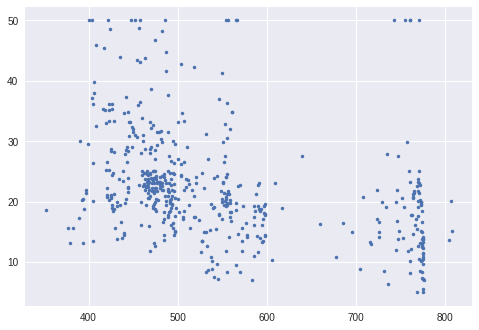

In [5]:
import matplotlib.pyplot as plt

s, u, v = tf.svd(X)
P_comp = tf.slice(v, [0, 0], [n + 1, 1])
X_proj = tf.matmul(X, P_comp)

with tf.Session() as sess:
    sess.run(X_proj)
    X_final = X_proj.eval()

plt.figure()
plt.plot(X_final, boston.target, ".")

*Exercise 4.1.* The code above plots the data along the first principal component. Modify the code to plot along the second.

*Exercise 4.2.* Does the result change if we perform feature scaling (see lab 2) before running the PCA algorithm?